In [2]:
#Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
#Read the data as a data frame

df = pd.read_csv('C:\\Users\\admin\\Downloads\\Bank_Personal_Loan_Modelling.csv')

In [4]:
#Shape of the data

print(df.shape)
print(df.size)

(5000, 14)
70000


In [5]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
#Data type of each attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
#Checking the presence of missing values

df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
#5 point summary of numerical attributes

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
df.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


From the above we can see that the data is having a huge bias (almost 1:10) towards the category of people not accepting the personal loan.

Hence we can form opinion that our model will tend to perform better towards predicting which customers wont accept the personal loan.

However, our problem is to identify the customers that can accept personal loan based on the selected available features.

In [10]:
DF0 = df.groupby('Personal Loan')
DF0 = DF0.get_group(0)
DF0.shape , DF0.describe().transpose()

((4520, 14),
                      count          mean          std     min       25%  \
 ID                  4520.0   2512.165487  1448.299331     1.0   1259.75   
 Age                 4520.0     45.367257    11.450427    23.0     35.00   
 Experience          4520.0     20.132301    11.456672    -3.0     10.00   
 Income              4520.0     66.237389    40.578534     8.0     35.00   
 ZIP Code            4520.0  93152.428761  2156.949654  9307.0  91911.00   
 Family              4520.0      2.373451     1.148771     1.0      1.00   
 CCAvg               4520.0      1.729009     1.567647     0.0      0.60   
 Education           4520.0      1.843584     0.839975     1.0      1.00   
 Mortgage            4520.0     51.789381    92.038931     0.0      0.00   
 Personal Loan       4520.0      0.000000     0.000000     0.0      0.00   
 Securities Account  4520.0      0.102212     0.302961     0.0      0.00   
 CD Account          4520.0      0.035841     0.185913     0.0      0.00   

In [11]:
DF1 = df.groupby('Personal Loan')
DF1 = DF1.get_group(1)
DF1.shape , DF1.describe().transpose()

((480, 14),
                     count          mean          std      min       25%  \
 ID                  480.0   2390.650000  1394.393674     10.0   1166.50   
 Age                 480.0     45.066667    11.590964     26.0     35.00   
 Experience          480.0     19.843750    11.582443      0.0      9.00   
 Income              480.0    144.745833    31.584429     60.0    122.00   
 ZIP Code            480.0  93153.202083  1759.223753  90016.0  91908.75   
 Family              480.0      2.612500     1.115393      1.0      2.00   
 CCAvg               480.0      3.905354     2.097681      0.0      2.60   
 Education           480.0      2.233333     0.753373      1.0      2.00   
 Mortgage            480.0    100.845833   160.847862      0.0      0.00   
 Personal Loan       480.0      1.000000     0.000000      1.0      1.00   
 Securities Account  480.0      0.125000     0.331064      0.0      0.00   
 CD Account          480.0      0.291667     0.455004      0.0      0.00   


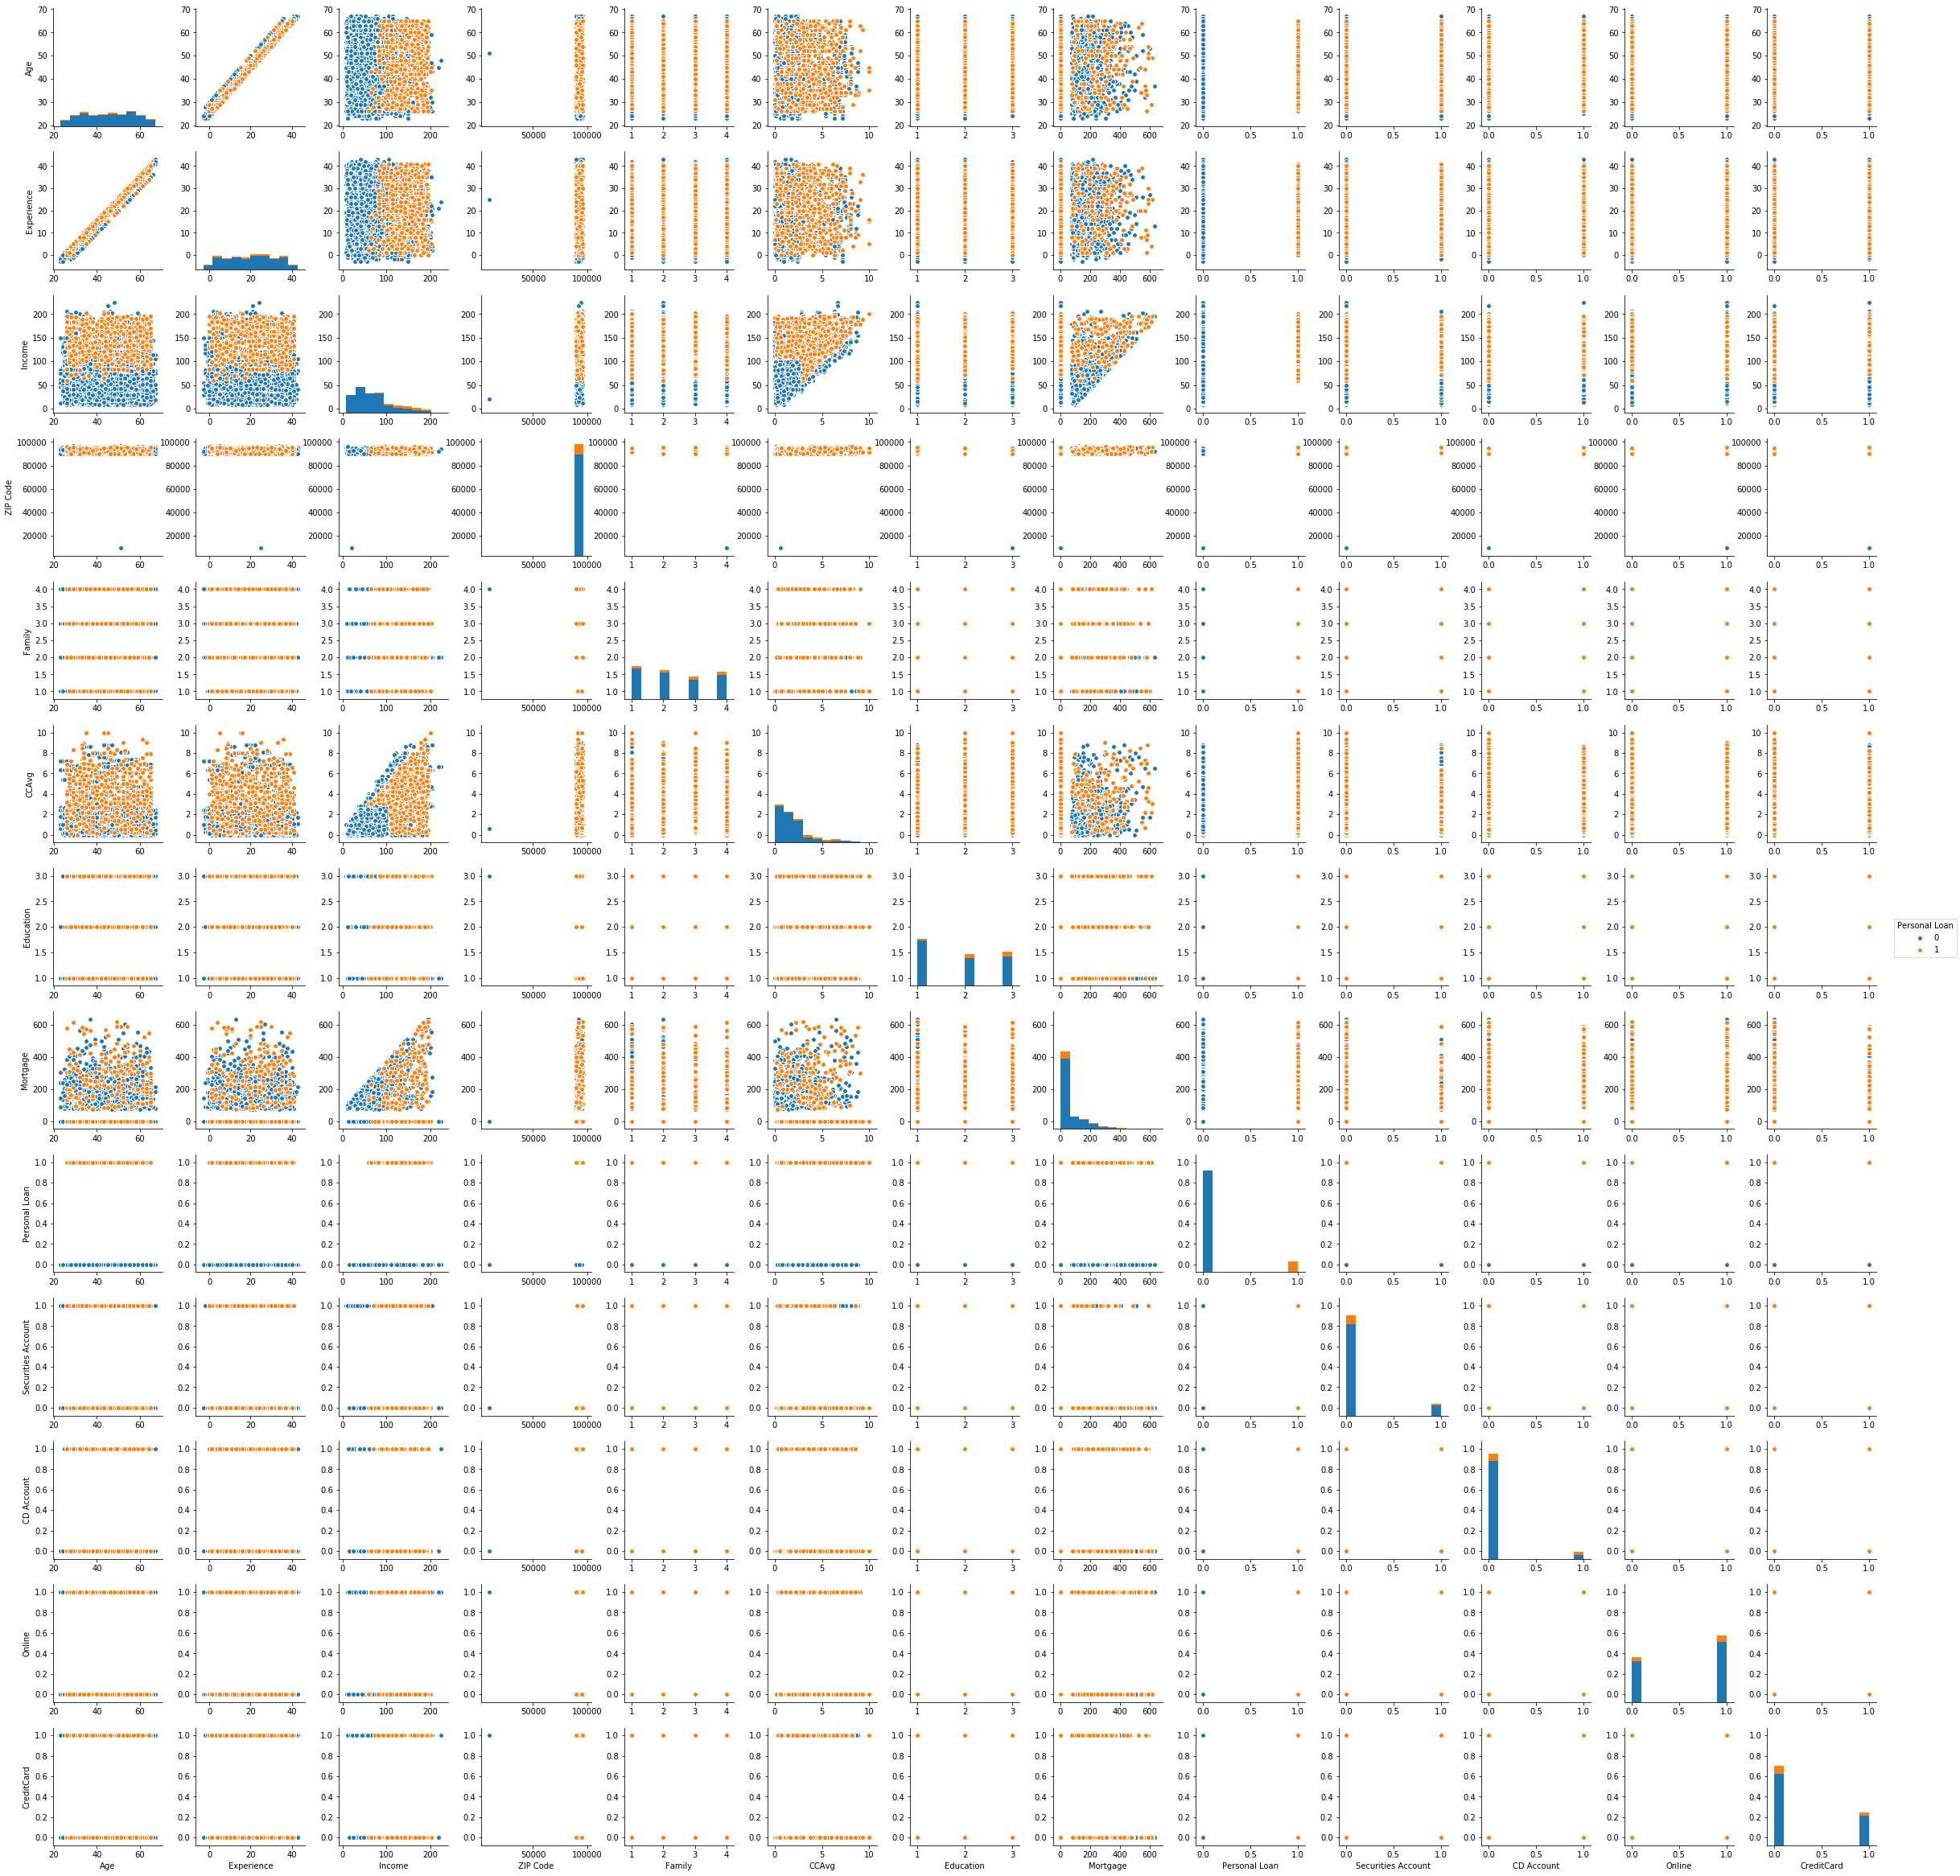

In [12]:
#The data distribution in each attribute.

sns.pairplot(df.iloc[:,1:], hue='Personal Loan')

Observations from above plot:-

1. Age feature: is normally distributed with majority of customers falling between 30 years and 60 years of age. 
    Thus, We can say that mean is almost equal to median.
2. Experience: is normally distributed with mostly customer having experience starting from 8 years. Here the mean 
    is equal to median. some of the Experience values are negative, which is not possible to measure negative years of 
    experience. We can delete these values, because we have 3 or 4 records from the sample.
3. Income: is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by 
    saying the mean is greater than the median
4. CCAvg: is also a positively skewed variable.

The distribution of families is evenly distributed.

In [13]:
#There are 52 records with negative experience,which is not possible,as experience cannot be negative.Hence we need to clean them

df[df['Experience'] < 0]['Experience'].count()

52

In [14]:
df['Experience'] = df["Experience"].abs()

In [15]:
# Checking if there are records with negative experience

df[df['Experience'] < 0]['Experience'].count()

0

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


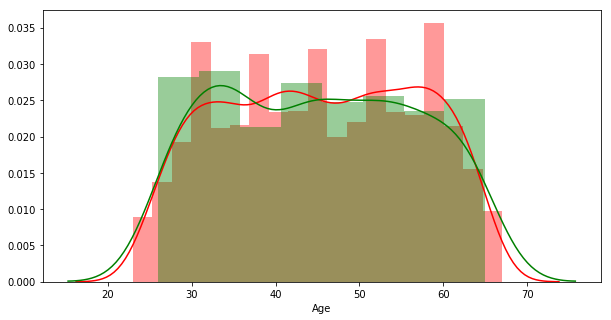

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(DF0['Age'],color='r')
sns.distplot(DF1['Age'],color='G')

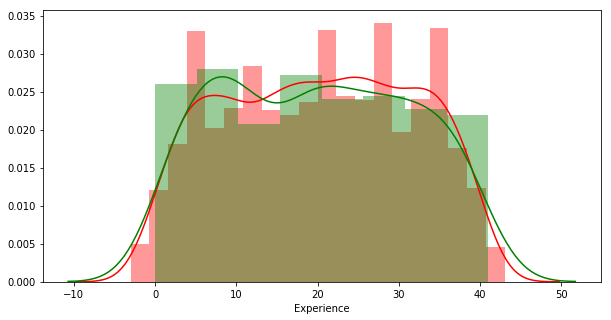

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(DF0['Experience'], color ='r')
sns.distplot(DF1['Experience'], color ='G')

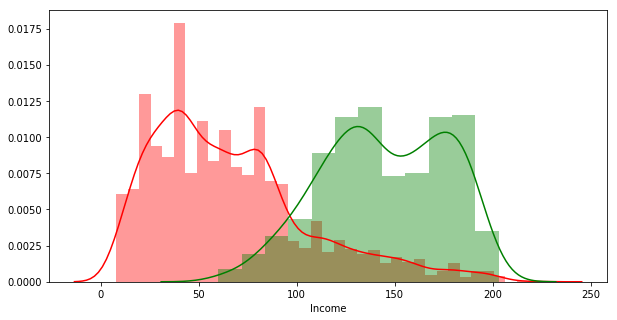

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(DF0['Income'], color ='r')
sns.distplot(DF1['Income'], color ='G')

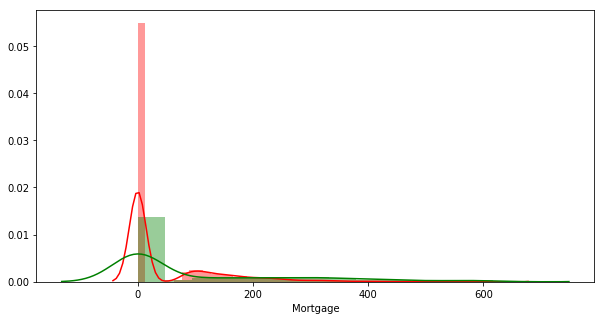

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(DF0['Mortgage'], color ='r')
sns.distplot(DF1['Mortgage'], color ='G')

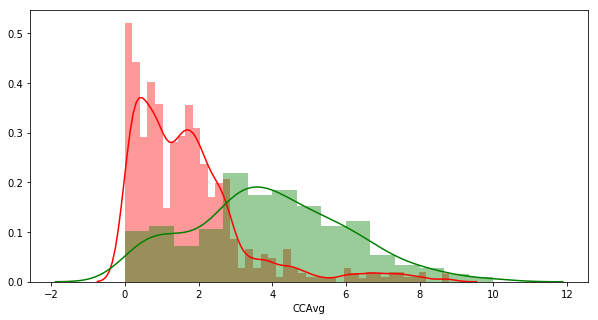

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(DF0['CCAvg'], color ='r')
sns.distplot(DF1['CCAvg'], color ='G')

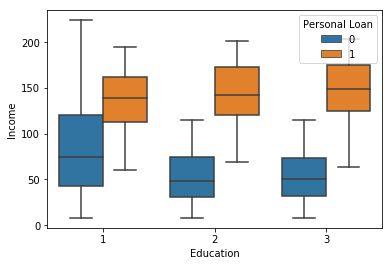

In [22]:
# Distribution of income and education on personal loan

sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

#Observation : It seems the customers whose education level is 1 is having more income. 
              

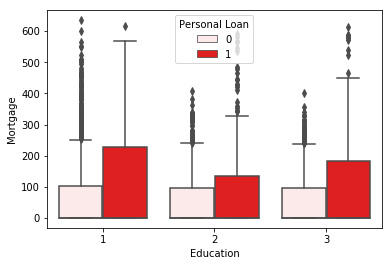

In [23]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df,color='Red')

#Observation : Customer who do not have personal loan and customer who has personal loan have high mortgage.

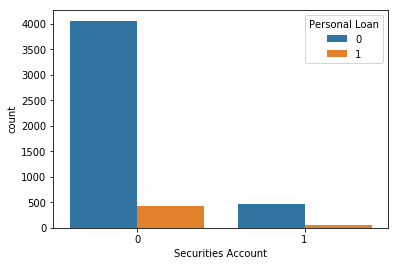

In [24]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

#Observation: Most of the customers who does not have loan have securities account

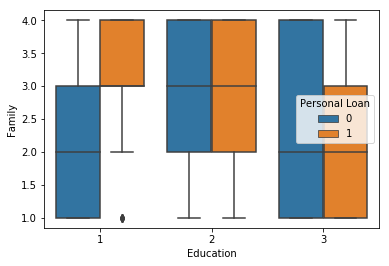

In [25]:
sns.boxplot(x='Education',y='Family',hue='Personal Loan',data=df)

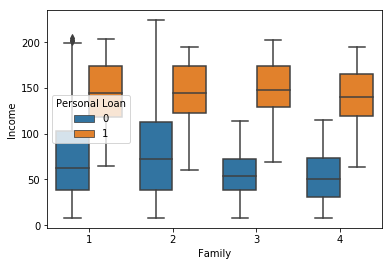

In [26]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=df)

#Observation: It seems families with size of 3 are more likely to take loan.

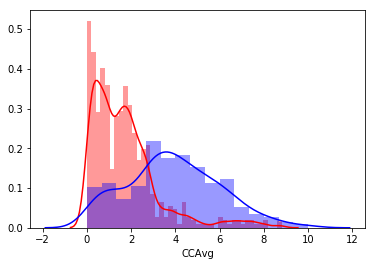

In [27]:
sns.distplot( df[df["Personal Loan"] == 0]['CCAvg'], color = 'r')
sns.distplot( df[df["Personal Loan"] == 1]['CCAvg'], color = 'b')

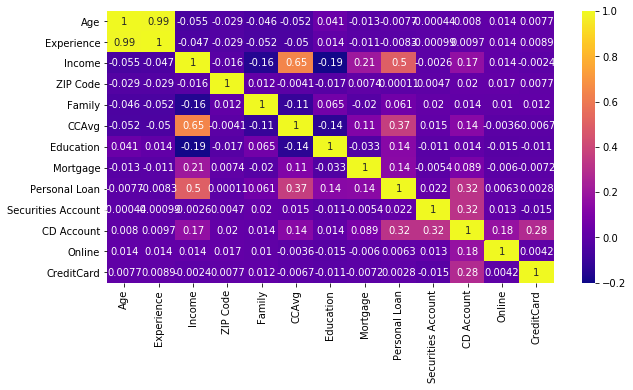

In [28]:
# Correlation

DF_corr= df.drop('ID', axis=1)
corr = DF_corr.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='plasma',vmin=-0.2,vmax=1)

#Observation

#1. Income and CCAvg also Income and Personal Loan are moderately correlated.
#2. Age and Experience is highly correlated
#3. Personal Loan has maximum correlation with :(Income, CCAvg, CD Account, Mortgage and Education)
#4. Mortgage has moderate correlation with Income.

# Split Dataset into Training and Test

In [29]:
# Split Dataset into Training and Test
# Since ID doesnt have any effect on the data, we shall drop the same.

X = df.drop(['ID','Experience','Personal Loan'], axis=1)
y = df['Personal Loan']

In [30]:
X.columns

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [31]:
# Splitting data into 70:30 training:testing respectively.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [32]:
# For Scaling

from sklearn import preprocessing

ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=10)

# MODEL BUILDING - LOGISTIC REGRESSION

In [33]:
# Without Scaling

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_predict = model1.predict(X_test)

In [34]:
# Calculate the model score and print confusion matrix

model1_score = model1.score(X_test, y_test)
print(model1_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

# Observation - Without scaling we got accuracy - 89.9%

0.899333333333
[[1302   58]
 [  93   47]]
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1360
          1       0.45      0.34      0.38       140

avg / total       0.89      0.90      0.89      1500



In [35]:
# With Scaling

model1a = LogisticRegression()
model1a.fit(ZX_train, y_train)
y_predict = model1a.predict(ZX_test)
model1a_score = model1a.score(ZX_test, y_test)
print(model1a_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

# Observation - With scaling we got accuracy - 95.2%

0.952666666667
[[1339   21]
 [  50   90]]
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      1360
          1       0.81      0.64      0.72       140

avg / total       0.95      0.95      0.95      1500



# MODEL BUILDING- NAIVE BAYES

In [36]:
# Without Scaling

from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()
model2.fit(X_train,y_train)
y_predict = model2.predict(X_test)
model2_score = model2.score(X_test, y_test)
print(model2_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

# Observation - Without scaling we got accuracy - 88.6%

0.886
[[1243  117]
 [  54   86]]
             precision    recall  f1-score   support

          0       0.96      0.91      0.94      1360
          1       0.42      0.61      0.50       140

avg / total       0.91      0.89      0.90      1500



In [37]:
# With Scaling

model2a = GaussianNB()
model2a.fit(ZX_train,y_train)
y_predict = model2a.predict(ZX_test)
model2a_score = model2.score(ZX_test, y_test)
print(model2a_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

# Observation - With scaling we got accuracy - 90.6%

0.906666666667
[[1234  126]
 [  56   84]]
             precision    recall  f1-score   support

          0       0.96      0.91      0.93      1360
          1       0.40      0.60      0.48       140

avg / total       0.90      0.88      0.89      1500



# MODEL BUILDING - KNN

In [38]:
# Without scaling

from sklearn.neighbors import KNeighborsClassifier

KNN_a= KNeighborsClassifier(n_neighbors= 5, weights = 'distance' )
KNN_a.fit(X_train, y_train)
y_predict = KNN_a.predict(X_test)
KNN_a_score = KNN_a.score(X_test, y_test)
print(KNN_a_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

# Observation - Without scaling we got accuracy - 88.8%

0.888666666667
[[1297   63]
 [ 104   36]]
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1360
          1       0.36      0.26      0.30       140

avg / total       0.87      0.89      0.88      1500



In [39]:
from scipy.stats import zscore


# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe


df_z = df.apply(zscore)  # convert all attributes to Z scale 

pruned_df_z = df_z.drop(['Personal Loan' ,'Experience', 'ID'], axis=1)

pruned_df_z.describe()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,1.939449e-16,1.513445e-15,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-1.428969e+00,-3.951919e+01,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-7.554825e-01,-5.851619e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,5.263146e-01,6.860245e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,3.263712e+00,1.648959e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [40]:
# With Scaling

KNN_b = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
KNN_b.fit(ZX_train, y_train)
y_predict = KNN_b.predict(ZX_test)
KNN_b_score = KNN_b.score(ZX_test, y_test)
print(KNN_b_score)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

# Observation - With scaling we got accuracy - 96.4%

0.964
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      1360
          1       0.92      0.67      0.78       140

avg / total       0.96      0.96      0.96      1500

[[1352    8]
 [  46   94]]


# CONCLUSION

From the above, we can clearly see that K-Nearest Neighbors algorithm with scaled data gives us the best accuracy of 96.4% with the least Type 1 (False Positive) and Type 2 (False Negative) errors.